# Kodluyoruz Veri Bilimi Bootcamp - EDA


İstatistikte, keşifsel veri analizi (exploratory data analysis; EDA), genellikle istatistiksel grafikler ve diğer veri görselleştirme yöntemlerini kullanarak temel özelliklerini **özetlemek** için **veri kümelerini analiz etme** yaklaşımıdır.

EDA'in amaçları şunlardır:

*   Gözlenen fenomenin nedenleri hakkında hipotezler önermek.
*   İstatistiksel çıkarımın dayandırılacağı varsayımları değerlendirmek.
*   Uygun istatistiksel araç ve tekniklerin seçimini desteklemek.
*   Anketler veya deneyler yoluyla daha fazla veri toplanması için bir temel sağlamak.


Mesela elimizde bir veri olduğunu düşünelim. Bu veride öğrencilerin bazı derslerden aldığı notlar var. 

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv')

In [ ]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Acaba notları tahmin edebilir miyiz? Bir varsayım yapalım,

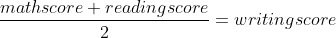

In [ ]:
((dataset['math score'] + dataset['reading score']) / 2) - dataset['writing score']

0     -2.0
1     -8.5
2     -0.5
3      8.0
4      2.0
      ... 
995   -1.5
996    3.5
997    0.0
998   -4.0
999   -4.5
Length: 1000, dtype: float64

En fazla bu kadar puan fark oluyor:

In [ ]:
max(((dataset['math score'] + dataset['reading score']) / 2) - dataset['writing score'])

16.5

Ortalama bu kadar uzak tahmin etmişiz

In [ ]:
sum(abs(((dataset['math score'] + dataset['reading score']) / 2) - dataset['writing score'])) / 1000

4.888

Verimiz üzerinde daha fazla öngörüye sahip olmak için incelemeye devam edebiliriz.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Verimiz daha gerçekçi olsun diye rastgele NaN'lar ekleyeceğim.

In [ ]:
dataset.mask(np.random.random(dataset.shape) < .1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,NaN,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN
2,female,group B,master's degree,standard,none,NaN,95.0,NaN
3,NaN,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,NaN,NaN,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,NaN,55.0,NaN
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,NaN,standard,NaN,68.0,78.0,77.0


In [ ]:
normal_dataset = dataset.mask(np.random.random(dataset.shape) < .1)

In [ ]:
normal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       917 non-null    object 
 1   race/ethnicity               898 non-null    object 
 2   parental level of education  911 non-null    object 
 3   lunch                        898 non-null    object 
 4   test preparation course      908 non-null    object 
 5   math score                   902 non-null    float64
 6   reading score                915 non-null    float64
 7   writing score                893 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
normal_dataset.describe()

,math score,reading score,writing score
count,902.000000,915.000000,893.000000
mean,66.100887,68.919126,68.013438
std,15.080613,14.471583,15.219465
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,76.750000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
normal_dataset.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,917,898,911,898,908,902.000000,915.000000,893.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,479,286,212,585,585,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.100887,68.919126,68.013438
std,NaN,NaN,NaN,NaN,NaN,15.080613,14.471583,15.219465
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,57.000000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,76.750000,79.000000,79.000000


In [ ]:
normal_dataset['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', nan, 'group D', 'group E'],
      dtype=object)

Dataset temizlemek bir sütun çıkartmak değildir. 

*   NaN'ları silmek
*   NaN'lara ortalama değerler atamak
*   Outlier'ları silmek
*   Tekrar eden verileri silmek

ve benzeri işlemler temizlemek olarak sayılabilir. Şimdilik onları tüm veri üzerine yapmak yerine ilerledikçe ortaya çıkan data frame'ler üzerinde yapacağız.

Bazı önemli fonksiyonlar:

*   NaN değerleri doldur -> fillna
*   Tekrar eden satırları sil -> drop_duplicates
*   Tip değişikliği yap -> astype  

In [ ]:
normal_dataset.drop(['race/ethnicity', 'gender'], axis=1)

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,bachelor's degree,standard,NaN,72.0,72.0,74.0
1,some college,standard,completed,NaN,90.0,88.0
2,master's degree,standard,none,90.0,95.0,93.0
3,associate's degree,free/reduced,none,47.0,57.0,44.0
4,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...
995,master's degree,standard,completed,NaN,NaN,95.0
996,high school,free/reduced,none,62.0,55.0,55.0
997,high school,free/reduced,NaN,59.0,71.0,65.0
998,some college,standard,completed,68.0,78.0,77.0


In [ ]:
cleaned_dataset = normal_dataset.drop(['race/ethnicity', 'gender'], axis=1)

Başka bir analiz yapıp kursa katılmanın notlar üzerindeki etkisine bakalım.

In [ ]:
cleaned_dataset['test preparation course'].notnull()

0      False
1       True
2       True
3       True
4       True
       ...  
995     True
996     True
997    False
998     True
999    False
Name: test preparation course, Length: 1000, dtype: bool

In [ ]:
course_notnull = cleaned_dataset['test preparation course'].notnull()

In [ ]:
cleaned_dataset[course_notnull].reset_index()

,index,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,some college,standard,completed,NaN,90.0,88.0
1,2,master's degree,standard,none,90.0,95.0,93.0
2,3,associate's degree,free/reduced,none,47.0,57.0,44.0
3,4,some college,standard,none,76.0,78.0,75.0
4,5,associate's degree,standard,none,71.0,83.0,78.0
...,...,...,...,...,...,...,...
903,993,bachelor's degree,free/reduced,none,62.0,72.0,74.0
904,994,high school,standard,none,63.0,63.0,62.0
905,995,master's degree,standard,completed,NaN,NaN,95.0
906,996,high school,free/reduced,none,62.0,55.0,55.0


In [ ]:
course = cleaned_dataset[course_notnull].reset_index().drop(['index'], axis=1)

loc label'a göre çalışıyor, istediğiniz aralığı verip erişebilirsiniz fakat istediğiniz sütun başlıklarını da vermelisiniz. Sütunları da index ile vermek istiyorsanız iloc kullanabilirsiniz.

In [ ]:
course.loc[:, ['test preparation course', 'math score', 'reading score', 'writing score']]

,test preparation course,math score,reading score,writing score
0,completed,66.43,90.00,88.0
1,none,90.00,95.00,93.0
2,none,47.00,57.00,44.0
3,none,76.00,78.00,75.0
4,none,71.00,83.00,78.0
...,...,...,...,...
903,none,62.00,72.00,74.0
904,none,63.00,63.00,62.0
905,completed,66.43,69.11,95.0
906,none,62.00,55.00,55.0


In [ ]:
course = course.loc[:, ['test preparation course', 'math score', 'reading score', 'writing score']]

In [ ]:
course.describe()

,math score,reading score,writing score
count,908.000000,908.000000,908.000000
mean,66.430760,69.118480,68.316916
std,13.817137,13.482693,14.077437
min,22.000000,24.000000,15.000000
25%,58.000000,60.750000,60.000000
50%,66.430000,69.110000,68.310000
75%,75.000000,78.000000,77.000000
max,100.000000,100.000000,100.000000


In [ ]:
course['reading score'].fillna(69.11)

0      90.00
1      95.00
2      57.00
3      78.00
4      83.00
       ...  
903    72.00
904    63.00
905    69.11
906    55.00
907    78.00
Name: reading score, Length: 908, dtype: float64

In [ ]:
course['math score'] = course['math score'].fillna(66.43)
course['reading score'] = course['reading score'].fillna(69.11)
course['writing score'] = course['writing score'].fillna(68.31)

Aşağıda gördüğümüz gibi hepsinin count değerleri eşit ve mean değerleri değişmedi.

In [ ]:
course.describe()

,math score,reading score,writing score
count,908.000000,908.000000,908.000000
mean,66.430760,69.118480,68.316916
std,13.817137,13.482693,14.077437
min,22.000000,24.000000,15.000000
25%,58.000000,60.750000,60.000000
50%,66.430000,69.110000,68.310000
75%,75.000000,78.000000,77.000000
max,100.000000,100.000000,100.000000


In [ ]:
course['test preparation course'] == 'completed'

0       True
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905     True
906    False
907     True
Name: test preparation course, Length: 908, dtype: bool

In [ ]:
completed_filter = course['test preparation course'] == 'completed'

In [ ]:
not_completed_filter = ~completed_filter

In [ ]:
course[completed_filter]['math score'] + course[completed_filter]['reading score'] + course[completed_filter]['writing score']

0      244.43
5      249.11
7      195.00
12     220.00
19     204.11
        ...  
899    221.31
900    242.00
901    225.00
905    230.54
907    223.00
Length: 323, dtype: float64

In [ ]:
total_comp_score = course[completed_filter]['math score'] + course[completed_filter]['reading score'] + course[completed_filter]['writing score']

In [ ]:
sum(total_comp_score)

69933.49999999999

In [ ]:
total_not_comp_score = course[not_completed_filter]['math score'] + course[not_completed_filter]['reading score'] + course[not_completed_filter]['writing score']

In [ ]:
sum(total_not_comp_score)

115176.9699999998

In [ ]:
sum(total_comp_score) / total_comp_score.size / 3

72.17079463364291

In [ ]:
sum(total_not_comp_score) / total_not_comp_score.size / 3

65.62790313390302

In [ ]:
scores = ['math score', 'reading score', 'writing score']
course[scores]

,math score,reading score,writing score
0,66.43,90.00,88.0
1,90.00,95.00,93.0
2,47.00,57.00,44.0
3,76.00,78.00,75.0
4,71.00,83.00,78.0
...,...,...,...
903,62.00,72.00,74.0
904,63.00,63.00,62.0
905,66.43,69.11,95.0
906,62.00,55.00,55.0


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv')

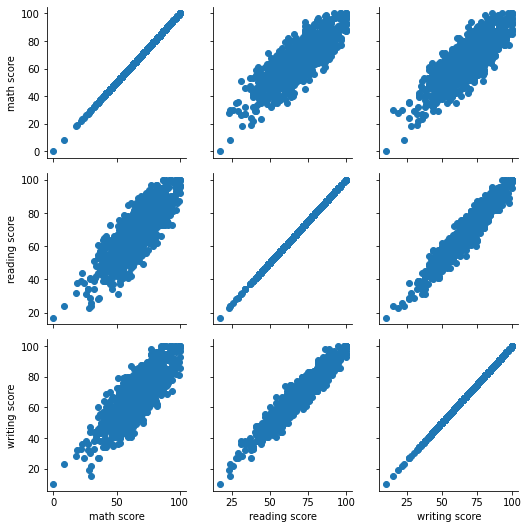

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(dataset[scores])
g.map(plt.scatter);

In [ ]:
s = ['parental level of education', 'math score', 'writing score', 'reading score']
dataset[s]

,parental level of education,math score,writing score,reading score
0,bachelor's degree,72,74,72
1,some college,69,88,90
2,master's degree,90,93,95
3,associate's degree,47,44,57
4,some college,76,75,78
...,...,...,...,...
995,master's degree,88,95,99
996,high school,62,55,55
997,high school,59,65,71
998,some college,68,77,78


ÖDEV: Parental Level Of Education'ın notlar üzerine etkisini gösterin. Şöyle bir çıktı istiyorum:
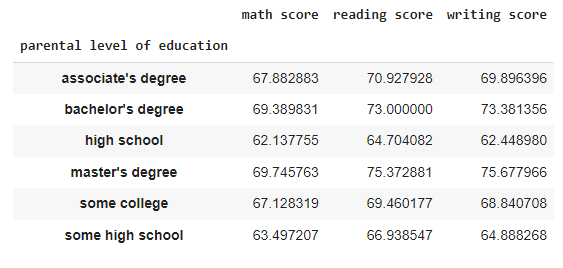